In [2]:
import os
import pandas as pd 
import numpy as np 
import scipy as scp
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

# import statsmodels.api as sm
import matplotlib.pyplot as plt

#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [13]:
# dataframe0 = pd.read_csv('/home/kannika/code/FeaturesVector_Testset.csv') #Test Set
dataframe = pd.read_csv('/home/yupaporn/CSV_file/FeatureVector_CCA_case_DiagRadioExp_AzureDb813_addFP.csv')
dataframe = dataframe.drop(['Unnamed: 0'], axis=1)

In [133]:
modelFPA = 'logis_fpaFV_full.pkl'
modelFPB = 'logis_fpbFV_full.pkl'
modelFPC = 'logis_fpcFV_full.pkl'
modelFPD = 'logis_fpdFV_full.pkl'
modelFPE = 'logis_fpaAllFV_full.pkl'

In [87]:
dataframe_FPA = dataframe[(dataframe['Views']=='FP-A')].reset_index(drop=True)
dataframe_FPB = dataframe[(dataframe['Views']=='FP-B')].reset_index(drop=True)
dataframe_FPC = dataframe[(dataframe['Views']=='FP-C')].reset_index(drop=True)
dataframe_FPD = dataframe[(dataframe['Views']=='FP-D')].reset_index(drop=True)
dataframe_FPA = dataframe[(dataframe['Views']=='FP-E')].reset_index(drop=True)

In [88]:
import pickle

In [134]:
FP = ['FP-A', 'FP-B', 'FP-C', 'FP-D', 'FP-E']
modelFP = [modelFPA, modelFPB, modelFPC, modelFPD, modelFPE]
res = []
for i in range(len(FP)):
    print(i)
    #load model
    filename = modelFP[i]
    os.chdir('/media/tohn/SSD/ModelTrainByImages/model_logistic/from_FV/')
    with open(filename, 'rb') as file:
        model = pickle.load(file)
    # data
    data = dataframe[(dataframe['Views']==FP[i])].reset_index(drop=True)
    X_test = data.iloc[:,1:2049]
    y_test = data.iloc[:,2055]
    #prediction
    preds = model.predict(X_test)
    
    class_report=classification_report(y_test, preds)
    accuracy = metrics.accuracy_score(y_test, preds)
    precision = float(class_report[-35:-31])
    recall = float(class_report[-25:-21])
    f1_score = float(class_report[-15:-11])
    res.append({'accuracy':accuracy,'precision':precision,'recall':recall, 'f1_score':f1_score})

0
1
2
3
4


/home/yupaporn/miniconda3/envs/USAI3/lib/python3.6/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/yupaporn/miniconda3/envs/USAI3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yupaporn/miniconda3/envs/USAI3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yupaporn/miniconda3/envs/USAI3/lib/python3.6

In [135]:
df = pd.DataFrame(res)
df

,accuracy,precision,recall,f1_score
0,0.538889,0.45,0.54,0.49
1,0.795775,0.68,0.80,0.73
2,0.629834,0.50,0.63,0.56
3,0.826667,0.86,0.83,0.80
4,0.924731,0.94,0.92,0.93


In [141]:
df.describe()

,accuracy,precision,recall,f1_score
count,5.000000,5.000000,5.000000,5.000000
mean,0.743179,0.686000,0.744000,0.702000
std,0.155948,0.215128,0.155016,0.178522
min,0.538889,0.450000,0.540000,0.490000
25%,0.629834,0.500000,0.630000,0.560000
50%,0.795775,0.680000,0.800000,0.730000
75%,0.826667,0.860000,0.830000,0.800000
max,0.924731,0.940000,0.920000,0.930000


# testting code

In [121]:
#load model
import pickle
# os.chdir('/media/tohn/SSD/ModelTrainByImages/model_logistic/from_FV/')
os.chdir('/media/tohn/SSD/ModelTrainByImages/model_logistic/from_prob/')
# filename = "logis_fpaFV_full.pkl"
filename = 'logis_fpAProb_full.pkl'
with open(filename, 'rb') as file:
    model = pickle.load(file)

/home/yupaporn/miniconda3/envs/USAI3/lib/python3.6/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [122]:
# #load model
# import pickle
# os.chdir('/media/tohn/SSD/ModelTrainByImages/model_logistic/from_FV/')
# filename = "logis_fpaFV_full.pkl"
# with open(filename, 'rb') as file:
#     model = pickle.load(file)

In [123]:
dataframe0 = dataframe
dataframe0 = dataframe0[(dataframe0['Views']=='FP-A')].reset_index(drop=True)
dataframe0

,Unnamed: 0.1,0,1,2,3,4,5,6,7,8,...,P ID,date,Path crop,Class,Sub_class_name,Sub_class,category,Prob,FileName,Views
0,1,0.424074,0.373215,-0.190315,-0.057949,-0.046992,0.396701,0.121641,-0.017305,0.054296,...,12150,11/10/2021,/media/tohn/SSD/ImageFromAzureDB_IsanCohort_cr...,Normal,['Normal'],['Normal'],Normal,1.000000,12150_2.jpg,FP-A
1,2,0.887827,0.255022,-0.073275,-0.155301,-0.180442,0.398387,-0.110631,0.108062,-0.204318,...,12150,11/10/2021,/media/tohn/SSD/ImageFromAzureDB_IsanCohort_cr...,Normal,['Normal'],['Normal'],Normal,0.995922,12150_3.jpg,FP-A
2,3,0.124215,0.241486,-0.099518,-0.124972,-0.212320,0.218725,-0.138051,-0.132332,0.236123,...,12150,11/10/2021,/media/tohn/SSD/ImageFromAzureDB_IsanCohort_cr...,Normal,['Normal'],['Normal'],Normal,0.999326,12150_4.jpg,FP-A
3,6,0.492503,0.297890,-0.180744,-0.132512,0.043977,0.038509,-0.055143,0.125787,0.100841,...,12150,11/10/2021,/media/tohn/SSD/ImageFromAzureDB_IsanCohort_cr...,Normal,['Normal'],['Normal'],Normal,1.000000,12150_7.jpg,FP-A
4,7,0.087984,0.020257,-0.079934,-0.073449,-0.123644,-0.015346,-0.120732,0.142388,-0.004840,...,12150,11/10/2021,/media/tohn/SSD/ImageFromAzureDB_IsanCohort_cr...,Normal,['Normal'],['Normal'],Normal,0.974343,12150_8.jpg,FP-A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,769,0.843931,0.330773,-0.203714,-0.146701,-0.014720,0.264327,-0.032788,0.162841,0.302013,...,12283,27/10/2021,/media/tohn/SSD/ImageFromAzureDB_IsanCohort_cr...,Normal,['Normal'],['Normal'],Normal,1.000000,12283_2.jpg,FP-A
176,782,-0.134558,0.227054,-0.208528,-0.016138,0.009497,0.037724,-0.123218,-0.154276,-0.089799,...,12284,27/10/2021,/media/tohn/SSD/ImageFromAzureDB_IsanCohort_cr...,Normal,['Normal'],['Normal'],Normal,0.999967,12284_1.jpg,FP-A
177,783,0.118872,0.002779,-0.194021,-0.146971,0.088636,-0.028771,-0.191636,0.201083,-0.208660,...,12284,27/10/2021,/media/tohn/SSD/ImageFromAzureDB_IsanCohort_cr...,Normal,['Normal'],['Normal'],Normal,0.999902,12284_2.jpg,FP-A
178,798,0.213114,0.391045,-0.153328,-0.167065,-0.164107,0.308857,-0.136019,-0.180745,0.037121,...,12285,27/10/2021,/media/tohn/SSD/ImageFromAzureDB_IsanCohort_cr...,Normal,['Normal'],['Normal'],Normal,0.995854,12285_1.jpg,FP-A


In [128]:
X_test = dataframe0.iloc[:,1:16]
#dataframe['Sub_class'] = dataframe['Sub_class'].astype(int)
y_test = dataframe0.iloc[:,2055]
print(X_test.shape)
print(y_test.shape)
print(y_test[0])
#print(X[0])

(180, 15)
(180,)
Normal


In [129]:
X_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.424074,0.373215,-0.190315,-0.057949,-0.046992,0.396701,0.121641,-0.017305,0.054296,-0.052858,0.070018,-0.166588,0.217455,0.184017,-0.013634
1,0.887827,0.255022,-0.073275,-0.155301,-0.180442,0.398387,-0.110631,0.108062,-0.204318,-0.165170,-0.142756,-0.095882,-0.128414,0.398074,-0.046402
2,0.124215,0.241486,-0.099518,-0.124972,-0.212320,0.218725,-0.138051,-0.132332,0.236123,-0.081532,-0.152507,-0.129333,-0.178262,0.072403,-0.197331
3,0.492503,0.297890,-0.180744,-0.132512,0.043977,0.038509,-0.055143,0.125787,0.100841,-0.186959,0.129312,-0.221160,0.170776,0.595492,-0.070274
4,0.087984,0.020257,-0.079934,-0.073449,-0.123644,-0.015346,-0.120732,0.142388,-0.004840,-0.075649,0.197633,-0.164629,0.024087,0.099330,-0.122095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.843931,0.330773,-0.203714,-0.146701,-0.014720,0.264327,-0.032788,0.162841,0.302013,0.343243,-0.066183,-0.142622,0.174901,0.059901,-0.161049
176,-0.134558,0.227054,-0.208528,-0.016138,0.009497,0.037724,-0.123218,-0.154276,-0.089799,-0.114794,-0.120672,-0.194727,-0.119186,0.120433,-0.181468
177,0.118872,0.002779,-0.194021,-0.146971,0.088636,-0.028771,-0.191636,0.201083,-0.208660,-0.163633,0.005430,-0.204720,0.500894,-0.115983,-0.077490
178,0.213114,0.391045,-0.153328,-0.167065,-0.164107,0.308857,-0.136019,-0.180745,0.037121,0.203481,0.048066,-0.162170,-0.078163,-0.062933,-0.145731


In [130]:
preds = model.predict(X_test)

In [127]:
print('Accuracy Score:', metrics.accuracy_score(y_test, preds))  

#Create classification report
class_report=classification_report(y_test, preds)
print(class_report)

Accuracy Score: 0.5388888888888889
              precision    recall  f1-score   support

        AB01       0.20      1.00      0.33         1
        AB02       0.17      1.00      0.29         1
        AB03       0.00      0.00      0.00         0
        AB04       0.33      1.00      0.50         1
        AB05       0.00      0.00      0.00         0
        AB06       0.00      0.00      0.00         0
       AB081       0.20      1.00      0.33         1
       AB082       0.50      1.00      0.67         1
       AB083       0.00      0.00      0.00         0
        AB12       0.00      0.00      0.00        60
      Normal       0.70      0.80      0.74       115

    accuracy                           0.54       180
   macro avg       0.19      0.53      0.26       180
weighted avg       0.45      0.54      0.49       180



/home/yupaporn/miniconda3/envs/USAI3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yupaporn/miniconda3/envs/USAI3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yupaporn/miniconda3/envs/USAI3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

In [56]:
accuracy = metrics.accuracy_score(y_test, preds)
accuracy

0.8154981549815498

In [79]:
precision = float(class_report[-35:-31])
precision

0.45

In [80]:
recall = float(class_report[-25:-21])
recall

0.54

In [81]:
f1_score = float(class_report[-15:-11])
f1_score

0.49

Text(0.5, 21.5, 'Predicted label')

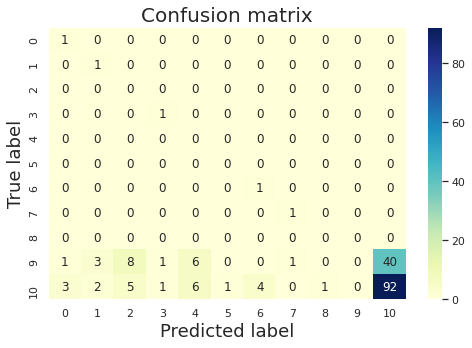

In [82]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, preds)

import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)